In [ ]:
# binary classification of dogs vs cats using a CNN from scratch
# tested with a small subset of images

In [29]:
import os, shutil
import matplotlib.pyplot as plt

In [6]:
original_dataset_dir = './data/dogscats/train'
base_dir = './data/dogscats_small'
shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [7]:
# Create dirs from test, train and validation. Each dir will have a subdir for each category: dog and cats

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [8]:
os.mkdir(validation_dir)
os.mkdir(train_dir)
os.mkdir(test_dir)

In [9]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [10]:
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [11]:
os.mkdir(train_dogs_dir)

In [12]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [13]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [14]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [15]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [16]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)



In [17]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [34]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [39]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [37]:
# Randomize images to reduce overfitting

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150,150), batch_size=20, class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
from IPython.display import display 
from PIL import Image


for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [40]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 15s 150ms/step - loss: 0.6960 - acc: 0.5135 - val_loss: 0.6896 - val_acc: 0.5250
Epoch 2/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6879 - acc: 0.5335 - val_loss: 0.6824 - val_acc: 0.5220
Epoch 3/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6788 - acc: 0.5705 - val_loss: 0.6813 - val_acc: 0.5210
Epoch 4/100
100/100 [==============================] - 13s 129ms/step - loss: 0.6716 - acc: 0.5870 - val_loss: 0.6486 - val_acc: 0.6090
Epoch 5/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6567 - acc: 0.6050 - val_loss: 0.6311 - val_acc: 0.6360
Epoch 6/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6447 - acc: 0.6215 - val_loss: 0.6247 - val_acc: 0.6390
Epoch 7/100
100/100 [==============================] - 13s 130ms/step - loss: 0.6310 - acc: 0.6340 - val_loss: 0.5993 - val_acc: 0.6700
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 14s 138ms/step - loss: 0.4420 - acc: 0.7855 - val_loss: 0.4231 - val_acc: 0.8080
Epoch 62/100
100/100 [==============================] - 14s 138ms/step - loss: 0.4396 - acc: 0.8020 - val_loss: 0.4073 - val_acc: 0.8090
Epoch 63/100
100/100 [==============================] - 14s 139ms/step - loss: 0.4430 - acc: 0.8060 - val_loss: 0.4400 - val_acc: 0.7870
Epoch 64/100
100/100 [==============================] - 14s 137ms/step - loss: 0.4289 - acc: 0.7915 - val_loss: 0.4454 - val_acc: 0.8000
Epoch 65/100
100/100 [==============================] - 14s 137ms/step - loss: 0.4415 - acc: 0.7840 - val_loss: 0.4403 - val_acc: 0.7960
Epoch 66/100
100/100 [==============================] - 14s 137ms/step - loss: 0.4300 - acc: 0.8000 - val_loss: 0.4298 - val_acc: 0.8050
Epoch 67/100
100/100 [==============================] - 14s 138ms/step - loss: 0.4584 - acc: 0.7780 - val_loss: 0.4576 - val_acc: 0.7810
Epoch 68/100
100/100 [===================

In [41]:
# save weights

model.save('cats_and_dogs_small_2.h5')

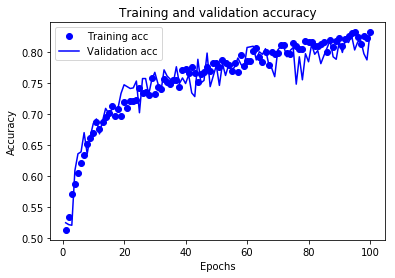

In [42]:
def plot_acc(history):
    history_dict = history.history
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    
    epochs = range (1, len(acc_values) +1)


    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    return plt

plt_acc = plot_acc(history)
plt_acc.show()

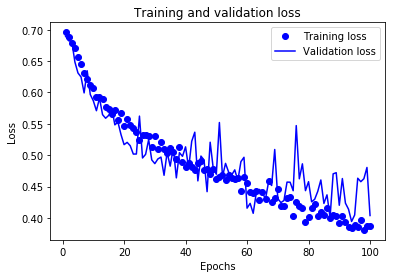

In [43]:
def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range (1, len(loss_values) +1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    return plt

plt = plot_loss(history)
plt.show()